In [2]:
!pip install rdkit-pypi
!pip install mordred
!pip install pubchempy
!pip install pandas
!pip install -q nglview
!pip install pandas

In [3]:
##Extracting SMILES, 2D and 3D structures of the Molecules

In [4]:
import pubchempy as pcp
import csv
import pubchempy as pcp
import pandas as pd
import numpy as np

In [5]:
import pubchempy as pcp

#molecules_OR51E1 = pd.read_csv('OR_AGONIST.csv')
#print(molecules_OR51E1.head(38))

#compound_names = molecules_OR51E1['AGONIST'].tolist()
#compound_names

# Load the data
molecules_OR51E1 = pd.read_csv('OR_AGONIST.csv')
print(molecules_OR51E1.head(53))

   RECEPTOR                          AGONIST
0     OR51E1           butyl butyryl lactate
1        NaN                 isovaleric acid
2        NaN                   nonanoic acid
3        NaN          3-methylpentanoic acid
4        NaN          4-methylpentanoic acid
5        NaN                    butyric acid
6        NaN            2-Methylbutyric acid
7        NaN      Cyclobutanecarboxylic acid
8        NaN                    Benzaldehyde
9        NaN                  2,3-Butanediol
10       NaN                        Coumarin
11       NaN                   octanoic acid
12       NaN                         octanal
13       NaN                    Benzophenone
14       NaN                  Methyl eugenol
15       NaN                        p-Cymene
16       NaN  5-Heptyldihydrofuran-2(3H)-one
17       NaN                 Ethyl caprylate
18       NaN                      Piperidine
19       NaN                  Heptanoic acid
20       NaN                      Hexylamine
21       N

In [7]:
# Initialize an empty list to store the SMILES strings
smiles_list = []

# For each molecule in the DataFrame
for index, row in molecules_OR51E1.iterrows():
    molecule_name = row['AGONIST']
    
    if pd.isnull(molecule_name):
        smiles_list.append(None)
        continue

    try:
        compounds = pcp.get_compounds(molecule_name, 'name')
        if len(compounds) > 0:  # Only add SMILES if a compound was found
            smiles_list.append(compounds[0].isomeric_smiles)
        else:  # Handle cases where the compound was not found
            smiles_list.append(None)
            print(f"No compound found for {molecule_name}.")
    except Exception as e:
        smiles_list.append(None)
        print(f'Error for molecule {molecule_name}: {str(e)}')   
        
  # Insert the SMILES strings as the third column in the DataFrame
molecules_OR51E1.insert(2, 'SMILES', smiles_list) 

print(molecules_OR51E1.head(53))      

   RECEPTOR                          AGONIST  \
0     OR51E1           butyl butyryl lactate   
1        NaN                 isovaleric acid   
2        NaN                   nonanoic acid   
3        NaN          3-methylpentanoic acid   
4        NaN          4-methylpentanoic acid   
5        NaN                    butyric acid   
6        NaN            2-Methylbutyric acid   
7        NaN      Cyclobutanecarboxylic acid   
8        NaN                    Benzaldehyde   
9        NaN                  2,3-Butanediol   
10       NaN                        Coumarin   
11       NaN                   octanoic acid   
12       NaN                         octanal   
13       NaN                    Benzophenone   
14       NaN                  Methyl eugenol   
15       NaN                        p-Cymene   
16       NaN  5-Heptyldihydrofuran-2(3H)-one   
17       NaN                 Ethyl caprylate   
18       NaN                      Piperidine   
19       NaN                  Heptanoic 

In [ ]:
molecules_OR51E1.head()

,RECEPTOR,AGONIST
0,OR51E1,butyl butyryl lactate
1,NaN,isovaleric acid
2,NaN,nonanoic acid
3,NaN,3-methylpentanoic acid
4,NaN,4-methylpentanoic acid


In [ ]:
molecules_OR51E1.to_csv('/home/ritesh/Desktop/MOLECULES/morgan/SMILES_mol11.csv')

Generates 2D .sdf files

2D SDF for butyl butyryl lactate saved as butyl_butyryl_lactate_2d.sdf
2D SDF for isovaleric acid saved as isovaleric_acid_2d.sdf
2D SDF for nonanoic acid saved as nonanoic_acid_2d.sdf
2D SDF for 3-methylpentanoic acid saved as 3-methylpentanoic_acid_2d.sdf
2D SDF for 4-methylpentanoic acid saved as 4-methylpentanoic_acid_2d.sdf
2D SDF for butyric acid saved as butyric_acid_2d.sdf
2D SDF for 2-Methylbutyric acid saved as 2-Methylbutyric_acid_2d.sdf
2D SDF for Cyclobutanecarboxylic acid saved as Cyclobutanecarboxylic_acid_2d.sdf
2D SDF for Benzaldehyde saved as Benzaldehyde_2d.sdf
2D SDF for 2,3-Butanediol saved as 2,3-Butanediol_2d.sdf
2D SDF for Coumarin saved as Coumarin_2d.sdf
2D SDF for octanoic acid saved as octanoic_acid_2d.sdf
2D SDF for octanal saved as octanal_2d.sdf
2D SDF for Benzophenone saved as Benzophenone_2d.sdf
2D SDF for Methyl eugenol saved as Methyl_eugenol_2d.sdf
2D SDF for p-Cymene saved as p-Cymene_2d.sdf
2D SDF for 5-Heptyldihydrofuran-2(3H)-one saved as 5-Hepty

In [ ]:
for molecule_name in compound_names:
    try:
        if pd.isnull(molecule_name):
            print("Skipping NaN value")
            continue
        threeD_SDF = pcp.get_compounds(molecule_name, 'name')
        if len(threeD_SDF) > 0:  # Only save SDF if a compound was found
            pcp.download('SDF', f'{molecule_name.replace(" ", "_")}_3d.sdf', twoD_SDF[0].cid, record_type='3d', overwrite=True)
            print(f"3D SDF for {molecule_name} saved as {molecule_name.replace(' ', '_')}_3d.sdf")
        else:  # Handle cases where the compound was not found
            print(f"No compound found for {molecule_name}.")
    except Exception as e:
        print(f'Error for molecule {molecule_name}: {str(e)}') 

3D SDF for butyl butyryl lactate saved as butyl_butyryl_lactate_3d.sdf
3D SDF for isovaleric acid saved as isovaleric_acid_3d.sdf
3D SDF for nonanoic acid saved as nonanoic_acid_3d.sdf
3D SDF for 3-methylpentanoic acid saved as 3-methylpentanoic_acid_3d.sdf
3D SDF for 4-methylpentanoic acid saved as 4-methylpentanoic_acid_3d.sdf
3D SDF for butyric acid saved as butyric_acid_3d.sdf
3D SDF for 2-Methylbutyric acid saved as 2-Methylbutyric_acid_3d.sdf
3D SDF for Cyclobutanecarboxylic acid saved as Cyclobutanecarboxylic_acid_3d.sdf
3D SDF for Benzaldehyde saved as Benzaldehyde_3d.sdf
3D SDF for 2,3-Butanediol saved as 2,3-Butanediol_3d.sdf
3D SDF for Coumarin saved as Coumarin_3d.sdf
3D SDF for octanoic acid saved as octanoic_acid_3d.sdf
3D SDF for octanal saved as octanal_3d.sdf
3D SDF for Benzophenone saved as Benzophenone_3d.sdf
3D SDF for Methyl eugenol saved as Methyl_eugenol_3d.sdf
3D SDF for p-Cymene saved as p-Cymene_3d.sdf
3D SDF for 5-Heptyldihydrofuran-2(3H)-one saved as 5-Hepty

In [ ]:
##Utilizing SMILES
#Using smiles to find 2

In [ ]:
# !pip install rdkit-pypi
# !pip install mordred

## Descriptor Calculation

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors3D
import numpy as np


In [ ]:
df = pd.read_csv('SMILES_mol.csv')
df

,Unnamed: 0,RECEPTOR,AGONIST,SMILES
0,0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC
1,1,NaN,isovaleric acid,CC(C)CC(=O)O
2,2,NaN,nonanoic acid,CCCCCCCCC(=O)O
3,3,NaN,3-methylpentanoic acid,CCC(C)CC(=O)O
4,4,NaN,4-methylpentanoic acid,CC(C)CCC(=O)O
5,5,NaN,butyric acid,CCCC(=O)O
6,6,NaN,2-Methylbutyric acid,CCC(C)C(=O)O
7,7,NaN,Cyclobutanecarboxylic acid,C1CC(C1)C(=O)O
8,8,NaN,Benzaldehyde,C1=CC=C(C=C1)C=O
9,9,NaN,"2,3-Butanediol",CC(C(C)O)O


In [ ]:
# Create an empty dictionary to hold descriptors
descriptors_dict = {
    'NumValenceElectrons': [],
    'NumRadicalElectrons': [],
    'MaxPartialCharge': [],
    'MinPartialCharge': [],
    'MaxAbsPartialCharge': [],
    'MinAbsPartialCharge': [],
}

# Compute descriptors for each molecule
for index, row in molecules_OR51E1.iterrows():
    molecule_name = row['AGONIST']
    smiles = row['SMILES']

    if pd.isnull(smiles):
        for descriptor in descriptors_dict.keys():
            if descriptor not in ['molecule_name', 'SMILES']:
                descriptors_dict[descriptor].append(None)
        continue

    try:
        # Create RDKit molecule object from SMILES string
        mol = Chem.MolFromSmiles(smiles)

        # Append data to the descriptors dictionary
        descriptors_dict['NumValenceElectrons'].append(Descriptors.NumValenceElectrons(mol))
        descriptors_dict['NumRadicalElectrons'].append(Descriptors.NumRadicalElectrons(mol))
        descriptors_dict['MaxPartialCharge'].append(Descriptors.MaxPartialCharge(mol))
        descriptors_dict['MinPartialCharge'].append(Descriptors.MinPartialCharge(mol))
        descriptors_dict['MaxAbsPartialCharge'].append(Descriptors.MaxAbsPartialCharge(mol))
        descriptors_dict['MinAbsPartialCharge'].append(Descriptors.MinAbsPartialCharge(mol))
        
    except Exception as e:
        print(f"Failed to compute descriptors for molecule: {molecule_name}. Error: {str(e)}")

# Convert the descriptors dictionary to a DataFrame
descriptors_df = pd.DataFrame(descriptors_dict)

print(descriptors_df)

KeyError: 'SMILES'

In [ ]:
descriptors_df

,MolecularWeight,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge
0,216.277,88.0,0.0,0.346649,-0.462963,0.462963,0.346649
1,102.133,42.0,0.0,0.303101,-0.481223,0.481223,0.303101
2,158.241,66.0,0.0,0.302840,-0.481230,0.481230,0.302840
3,116.160,48.0,0.0,0.303111,-0.481223,0.481223,0.303111
4,116.160,48.0,0.0,0.302850,-0.481230,0.481230,0.302850
5,88.106,36.0,0.0,0.302829,-0.481231,0.481231,0.302829
6,102.133,42.0,0.0,0.305695,-0.481034,0.481034,0.305695
7,100.117,40.0,0.0,0.305987,-0.481026,0.481026,0.305987
8,106.124,40.0,0.0,0.149548,-0.297896,0.297896,0.149548
9,90.122,38.0,0.0,0.076784,-0.390738,0.390738,0.076784


In [ ]:
descriptors_df.to_csv('/home/ritesh/Desktop/MOLECULES/morgan/SMILES_1d.csv')

NameError: name 'descriptors_df' is not defined

In [ ]:
import pandas as pd
import glob

# Get a list of all SDF files
sdf_files = glob.glob('*.sdf')

# Initialize a list to hold all the descriptors
descriptors = []

for sdf_file in sdf_files:
    # Load molecules from a 2D SDF file
    supplier = Chem.SDMolSupplier(sdf_file)

    for mol in supplier:
        if mol is None: continue

        # Calculate the descriptors
        mol_descriptors = {
            'Name': mol.GetProp('_Name'),
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            'TPSA': Descriptors.TPSA(mol),
        }

        # Append the descriptors for this molecule to the list
        descriptors.append(mol_descriptors)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(descriptors)
df

,Name,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,TPSA
0,637566,154.253,2.67140,1,1,4,20.23
1,12217,144.214,2.12980,0,2,5,26.30
2,8130,114.188,2.15570,0,1,5,17.07
3,323,146.145,1.79300,0,2,0,30.21
4,7714,184.279,3.05250,0,2,6,26.30
5,240,106.124,1.49910,0,1,1,17.07
6,379,144.214,2.43150,1,1,6,37.30
7,8082,85.150,0.75990,1,1,0,12.03
8,165675,156.269,2.43950,1,1,1,20.23
9,8144,146.299,3.27670,1,1,6,0.00


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('descriptors_2d.csv', index=False)

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('3d_descriptors.csv', index=False)

In [ ]:

# Load the data from the CSV file
df = pd.read_csv('SMILES_mol.csv')

# Initialize lists to store the descriptors
radius_of_gyration = []
inertial_shape_factor = []
eccentricity = []
asphericity = []
spherocity_index = []
PM1 = []
PM2 = []
PM3 = []
NPR1 = []
NPR2 = []

# For each molecule in the DataFrame
for index, row in df.iterrows():
    smiles = row['SMILES']  # Getting the SMILES string from the "SMILES" column for the current row


    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))
    inertial_shape_factor.append(Descriptors3D.InertialShapeFactor(molecule))
    eccentricity.append(Descriptors3D.Eccentricity(molecule))
    asphericity.append(Descriptors3D.Asphericity(molecule))
    spherocity_index.append(Descriptors3D.SpherocityIndex(molecule))
    PM1.append(Descriptors3D.PMI1(molecule))
    PM2.append(Descriptors3D.PMI2(molecule))
    PM3.append(Descriptors3D.PMI3(molecule))
    NPR1.append(Descriptors3D.NPR1(molecule))
    NPR2.append(Descriptors3D.NPR2(molecule))dataset2
dataset2

# Add the descriptors to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration
df['InertialShapeFactor'] = inertial_shape_factor
df['Eccentricity'] = eccentricity
df['Asphericity'] = asphericity
df['SpherocityIndex'] = spherocity_index
df['PrincipalMomentsOfInertia1'] = PM1
df['PrincipalMomentsOfInertia2'] = PM2
df['PrincipalMomentsOfInertia3'] = PM3
df['NormalizedPrincipalMomentsRatio1'] = NPR1
df['NormalizedPrincipalMomentsRatio2'] = NPR2


# Save the updated DataFrame to a CSV file
df.to_csv('SMILES_mol_with_3descriptors.csv', index=False)

In [ ]:
df.head()

,Unnamed: 0,RECEPTOR,AGONIST,SMILES,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,3.896729,0.003523,0.996236,0.763982,0.091957
1,1,NaN,isovaleric acid,CC(C)CC(=O)O,1.946693,0.008254,0.946318,0.326180,0.465115
2,2,NaN,nonanoic acid,CCCCCCCCC(=O)O,3.357841,0.005895,0.995396,0.741935,0.197180
3,3,NaN,3-methylpentanoic acid,CCC(C)CC(=O)O,2.032556,0.005382,0.928228,0.261820,0.461316
4,4,NaN,4-methylpentanoic acid,CC(C)CCC(=O)O,2.356977,0.008403,0.985701,0.577708,0.229300


## MORGAN and ECFP FINGERPRINT of two datasets

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem


In [2]:

# Load the CSV file into a dataframe
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/SMILES_mol.csv')

# Create a new column to store the fingerprints
df['Fingerprint'] = ''

# Generate ECFP fingerprints for each molecule in the dataframe
for i, row in df.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    
    # Generate ECFP4 fingerprint with radius 2 and bit length of 1024 
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    
    # Convert fingerprint to binary string representation and store it in the dataframe
    df.at[i, 'Fingerprint'] = fp.ToBitString()

# Save the updated dataframe back to CSV file
df.to_csv('fingerprinted_mols_FINAL_MORGAN.csv', index=False)

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('OR_AGONIST_update.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(61)

Morgan fingerprint calculation completed!


,RECEPTOR,AGONIST,SMILES,Fingerprint
0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,NaN,valeric acid,CCCCC(=O)O,0000000000000000000000000000000000000000000000...
2,NaN,4-Methylvaleric acid,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
3,NaN,5-Norbornene-2-carboxylic acid,C1C2CC(C1C=C2)C(=O)O,0000000000000000000000000000000000000000000000...
4,NaN,2-Methylvaleric acid,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
...,...,...,...,...
56,NaN,propanoic acid,CCC(=O)O,0010000000000000000000000000000000000000000000...
57,NaN,19-hydroxyandrostenedione,CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO,0000000100000000000000000000000000000000000000...
58,NaN,(E)-beta-Ionone,CC1=C(C(CCC1)(C)C)C=CC(=O)C,0000000000000000000000000000000100000000000000...
59,NaN,(E)-alpha-Ionone,CC1=CCCC(C1C=CC(=O)C)(C)C,0000000000000000000100000000000100000000000000...


In [17]:

# Load the CSV file into a dataframe
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/Smiles.csv')

# Create a new column to store the fingerprints
df['Fingerprint'] = ''

# Generate ECFP fingerprints for each molecule in the dataframe
for i, row in df.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    
    # Generate ECFP4 fingerprint with radius 2 and bit length of 1024 
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    
    # Convert fingerprint to binary string representation and store it in the dataframe
    df.at[i, 'Fingerprint'] = fp.ToBitString()

# Save the updated dataframe back to CSV file
df.to_csv('fingerprinted_Smiles_FINAL_ECFP.csv', index=False)
df.head(300)

,SMILES,Fingerprint
0,CSCCC=O,0000000000010000000000000000000001000000000000...
1,CCC(C)C=O,0100000000000000000000000000000001000000000000...
2,CC(=O)C(C)=O,0000000000000000000000000000000001000000000000...
3,CCCCC/C=C/C=C/C=O,0000000000000000000000000000000001000000000000...
4,CC1OC(=C(O)C1=O)C,0000000000000000000000000000000001000000000000...
...,...,...
218,CCCSSCCC,1000000000000000000000000000000001000000000000...
219,CCOC(=O)CCC(C)C,0100000000000000000000000000000001000000000000...
220,CCOC(=O)CCSC,0000000000010000000000000000000001000000000000...
221,CCCC[C@@H](CC)CCC([O-])=O,0100000000000000000000000000000001000000000000...


In [18]:
# Load the CSV file into a dataframe
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/Smiles.csv')

# Create a new column to store the fingerprints
df['Fingerprint'] = ''

# Generate Morgan fingerprints for each molecule in the dataframe
for i, row in df.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    
    # Generate Morgan fingerprint with radius 2 and bit length of 2048 
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    
    # Convert fingerprint to binary string representation and store it in the dataframe
    df.at[i, 'Fingerprint'] = fp.ToBitString()

# Save the updated dataframe back to CSV file
df.to_csv('morgan_SMiles_fp.csv', index=False)
df.head(278)

,SMILES,Fingerprint
0,CSCCC=O,0000000000010000000000000000000000000000000000...
1,CCC(C)C=O,0100000000000000000000000000000000000000000000...
2,CC(=O)C(C)=O,0000000000000000000000000000000000000000000000...
3,CCCCC/C=C/C=C/C=O,0000000000000000000000000000000000000000000000...
4,CC1OC(=C(O)C1=O)C,0000000000000000000000000000000000000000000000...
...,...,...
218,CCCSSCCC,0000000000000000000000000000000000000000000000...
219,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...
220,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...
221,CCCC[C@@H](CC)CCC([O-])=O,0100000000000000000000000000000000000000000000...


In [21]:
# Load the CSV file into a dataframe
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/SMILES_mol.csv')

# Create a new column to store the fingerprints
df['Fingerprint'] = ''

# Generate Morgan fingerprints for each molecule in the dataframe
for i, row in df.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    
    # Generate Morgan fingerprint with radius 2 and bit length of 2048 
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    
    # Convert fingerprint to binary string representation and store it in the dataframe
    df.at[i, 'Fingerprint'] = fp.ToBitString()

# Save the updated dataframe back to CSV file
df.to_csv('morgan_mol_fp.csv', index=False)
df.head(51)

,Unnamed: 0,RECEPTOR,AGONIST,SMILES,Fingerprint
0,0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,1,NaN,isovaleric acid,CC(C)CC(=O)O,0100000000000000000000000000000000000000000000...
2,2,NaN,nonanoic acid,CCCCCCCCC(=O)O,0000000000000000000000000000000000000000000000...
3,3,NaN,3-methylpentanoic acid,CCC(C)CC(=O)O,0100000000000000000000000000000000000000000000...
4,4,NaN,4-methylpentanoic acid,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
5,5,NaN,butyric acid,CCCC(=O)O,0000000000000000000000000000000000000000000000...
6,6,NaN,2-Methylbutyric acid,CCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
7,7,NaN,Cyclobutanecarboxylic acid,C1CC(C1)C(=O)O,0000000000000000000000000000000000000000000000...
8,8,NaN,Benzaldehyde,C1=CC=C(C=C1)C=O,0000000000000000000000000000000000000000000000...
9,9,NaN,"2,3-Butanediol",CC(C(C)O)O,0100000000000000000000000000000000000000000000...


In [11]:
# Load the CSV file into a dataframe
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/Q9H255_EC50_data.csv')

# Create a new column to store the fingerprints
df['Fingerprint'] = ''
# Check for NaN or non-string values in 'SMILES' column
invalid_smiles = df['SMILES'].isnull() | ~df['SMILES'].apply(lambda x: isinstance(x, str))

# Remove rows with invalid SMILES from DataFrame
df = df[~invalid_smiles].reset_index(drop=True)
# Generate Morgan fingerprints for each molecule in the dataframe
for i, row in df.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    
    # Generate Morgan fingerprint with radius 2 and bit length of 2048 
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    
    # Convert fingerprint to binary string representation and store it in the dataframe
    df.at[i, 'Fingerprint'] = fp.ToBitString()

# Save the updated dataframe back to CSV file
df.to_csv('newdata_fp.csv', index=False)
df1=df
df1.head(273)

,molecule_chembl_id,SMILES,standard_value,Fingerprint
0,CHEMBL773,NCC(=O)O,58.00000,0000000000000000000000000001000000000000000000...
1,CHEMBL4556656,O=C(O)[C@@H](O)CO,1.90000,0100000000000000000000000000000000000000000000...
2,CHEMBL1686,O=C(O)CCC(=O)C(=O)O,5.50000,0000000000000000000000000000000000000000000000...
3,CHEMBL276849,O=C1CCCN1,1.90000,0000000000000000000000000000000000000000000000...
4,CHEMBL2447922,O=C1CN=CN1,0.00760,0000000000000000000000000000000000000000000000...
5,CHEMBL1328799,Nc1nc2[nH]c(O)nc2c(=O)[nH]1,0.00044,0000000000000000000000000000000000000000000000...
6,CHEMBL406291,N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,1.30000,0100000000000000000000000000000000000000010000...
7,CHEMBL278081,N[C@H](CO)Cc1c[nH]cn1,0.03500,0100000000000000000000000000000000000000000000...
8,CHEMBL1234751,CC(=O)N[C@@H](CCC(=O)O)C(=O)O,0.23000,0100000000000000000000000000000000000000000000...
9,CHEMBL318743,COc1cc(CCC(=O)CC(=O)CCc2ccc(O)c(OC)c2)ccc1O,570.00000,0000000000000000000000000000000000000000000000...


In [12]:
df1=df
df1.head(273)


,molecule_chembl_id,SMILES,standard_value,Fingerprint
0,CHEMBL773,NCC(=O)O,58.00000,0000000000000000000000000001000000000000000000...
1,CHEMBL4556656,O=C(O)[C@@H](O)CO,1.90000,0100000000000000000000000000000000000000000000...
2,CHEMBL1686,O=C(O)CCC(=O)C(=O)O,5.50000,0000000000000000000000000000000000000000000000...
3,CHEMBL276849,O=C1CCCN1,1.90000,0000000000000000000000000000000000000000000000...
4,CHEMBL2447922,O=C1CN=CN1,0.00760,0000000000000000000000000000000000000000000000...
5,CHEMBL1328799,Nc1nc2[nH]c(O)nc2c(=O)[nH]1,0.00044,0000000000000000000000000000000000000000000000...
6,CHEMBL406291,N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,1.30000,0100000000000000000000000000000000000000010000...
7,CHEMBL278081,N[C@H](CO)Cc1c[nH]cn1,0.03500,0100000000000000000000000000000000000000000000...
8,CHEMBL1234751,CC(=O)N[C@@H](CCC(=O)O)C(=O)O,0.23000,0100000000000000000000000000000000000000000000...
9,CHEMBL318743,COc1cc(CCC(=O)CC(=O)CCc2ccc(O)c(OC)c2)ccc1O,570.00000,0000000000000000000000000000000000000000000000...


## various distance metrics for similarity calculation using the fingerprints

In [27]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')

    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                     'Euclidean Distance', 'Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:20], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:20]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances)

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/smiles/morgan_SMiles_fp.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
8                         CC=O
11       COC1=C(C=CC(=C1)C=O)O
17                 CCCC(=O)OCC
18                 CC\C=C/CC=O
22           C1=CC=C(C=C1)CC=O
23               CCOC(=O)C(C)C
25           CCC1=NC=C(N=C1C)C
31           CC/C=C/CC\C=C\C=O
33          CC(C)C1=NC=CN=C1OC
36                         CSC
37       COC1=C(C=CC(=C1)C=C)O
38                          CS
40           CCCCCC1CCCC(=O)O1
42        CCCCC[C@H]1CCC(=O)O1
46                         CCO
56    CCCC[C@H]1OC(=O)C[C@H]1C
58                 CCCCCC(O)=O
1                    CCC(C)C=O
12              CC(=O)C1=NCCC1
41                CC/C=C/CCC=O
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Euclidean Distance  Tanimoto Distance
8                0.0     0.000000e+00                 0.0                0.0
11               0.0     0.000000e+00                 0.0                0.0
17               0.0     0.000000e+00                 0.0                0.0
18   

## similarity b/w two more datasets

In [28]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')
    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                      'Euclidean Distance', 'Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:5], 'SMILES']
    most_similar_distances = sorted_similarity_df.iloc[:20]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances)

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/mol/morgan_mol_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/smiles/morgan_SMiles_fp.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
2                     CC(=O)C(C)=O
5                         CCCCCC=O
11           COC1=C(C=CC(=C1)C=O)O
12                  CC(=O)C1=NCCC1
16    C/C=C/C(=O)C1=C(C)C=CCC1(C)C
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Euclidean Distance  Tanimoto Distance
2           0.000000     0.000000e+00            0.000000           0.000000
5           0.000000     0.000000e+00            0.000000           0.000000
11          0.000000     0.000000e+00            0.000000           0.000000
12          0.000000     0.000000e+00            0.000000           0.000000
16          0.000000     0.000000e+00            0.000000           0.000000
17          0.000000     0.000000e+00            0.000000           0.000000
19          0.000000     0.000000e+00            0.000000           0.000000
23          0.000000     0.000000e+00            0.000000           0.000000
25          0.000000     0.000000e+00            0.000000        

In [15]:
import pandas as pd
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np


### most similar molecules b/w multiple datasets 


In [25]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances


def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')
    hyperbolic_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        hyperbolic_dist_matrix[i][j] = hyperbolic_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Hyperbolic Distance': hyperbolic_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                      'Hyperbolic Distance', 'Euclidean Distance', 'Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:10]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print("\nDistance Values:")
    print(most_similar_distances.round(20))

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/newdata_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/smiles/morgan_SMiles_fp.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
19                     CC\C=C/CC=O
23                C1=CC=C(C=C1)CCO
14                    CCC(C)C(O)=O
0                          CSCCC=O
2                     CC(=O)C(C)=O
11                  CCCCCC\C=C\C=O
1                        CCC(C)C=O
9                             CC=O
17    C/C=C/C(=O)C1=C(C)C=CCC1(C)C
16             CC(C)=CCCC(C)(O)C=C
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Hyperbolic Distance  \
19          0.000000         0.000000                  0.0   
23          0.000000         0.000000                  0.0   
14          0.003418         0.537090                  0.0   
0           0.003906         0.400000                  0.0   
2           0.005371         0.407001                  0.0   
11          0.005371         0.543565                  0.0   
1           0.005859         0.492907                  0.0   
9           0.006348         0.225083                  0.0   
17          0.006836     

In [26]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def hyperbolic_distance(u, v):
    u_norm = np.linalg.norm(u)
    v_norm = np.linalg.norm(v)

    return np.arccosh(1 + ((u @ v) / (u_norm * v_norm)) ** 2)
def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')
    hyperbolic_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        hyperbolic_dist_matrix[i][j] = hyperbolic_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Hyperbolic Distance': hyperbolic_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                      'Hyperbolic Distance', 'Euclidean Distance', 'Tanimoto Distance'])
    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:10]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(20))

    return most_similar_smiles, most_similar_distances


# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/newdata_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/mol/morgan_mol_fp.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
19                    CCCCCCN
20                    CCCCCCO
0     CCCCOC(=O)C(C)OC(=O)CCC
14    COC1=C(C=C(C=C1)CC=C)OC
2              CCCCCCCCC(=O)O
11              CCCCCCCC(=O)O
1                CC(C)CC(=O)O
8            C1=CC=C(C=C1)C=O
16            CCCCCCCC(=O)OCC
3               CCC(C)CC(=O)O
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Hyperbolic Distance  \
19          0.000000         0.000000             0.000000   
20          0.000000         0.000000             0.073604   
0           0.003906         0.400000             0.000000   
14          0.003906         0.566987             0.000000   
2           0.005371         0.407001             0.000000   
11          0.005859         0.543565             0.000000   
1           0.006836         0.516954             0.000000   
8           0.007324         0.374457             0.000000   
16          0.007812         0.552786             0.000000   
3           0

## string mapping to check for common smiles

In [55]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')

# Save merged dataset to a new CSV file
merged_dataset.to_csv('mapping.csv', index=False)
print(merged_dataset)
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/newdata_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/mol/morgan_mol_fp.csv"

Empty DataFrame
Columns: [molecule_chembl_id, standard_value, Fingerprint_x, Unnamed: 0, RECEPTOR , AGONIST, SMILES, Fingerprint_y]
Index: []


In [61]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')

# Save merged dataset to a new CSV file
merged_dataset.to_csv('mapping.csv', index=False)
print(merged_dataset)
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/newdata_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/mol/morgan_mol_fp.csv"

Empty DataFrame
Columns: [molecule_chembl_id, standard_value, Fingerprint_x, SMILES, Fingerprint_y]
Index: []


In [63]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')

# Save merged dataset to a new CSV file
merged_dataset.to_csv('mapping.csv', index=False)
print(merged_dataset)
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/newdata_fp.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/smiles/morgan_SMiles_fp.csv"

Empty DataFrame
Columns: [molecule_chembl_id, standard_value, Fingerprint_x, SMILES, Fingerprint_y]
Index: []


In [3]:
import pandas as pd
from rdkit import Chem

# Read the CSV file into a pandas DataFrame
filepathx = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv"
df = pd.read_csv(filepathx)


In [6]:
import requests
import pandas as pd

def get_smiles(agonist_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{agonist_name}/property/CanonicalSMILES/TXT"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.text.strip()
    else:
        print(f"Failed to retrieve SMILES for: {agonist_name}")
        return None

# Read the CSV file into a pandas DataFrame
filepathx = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv"
df = pd.read_csv(filepathx)

# Generate SMILES notation for each agonist using PubChem API
smiles_list = []
for index, row in df.iterrows():
    agonist_name = row['AGONIST']
    
    # Retrieve SMILES notation using PubChem API
    smiles = get_smiles(agonist_name)
    
    if smiles:
        smiles_list.append(smiles)
    else:
        smiles_list.append(None)

# Add generated SMILES column to original dataframe or create new dataframe with only SMILEs.
df['SMILES'] = smiles_list

# Save updated dataframe with additional 'SMILES' column back to csv file.
df.to_csv(filepathx, index=False)

print("SMILES generation completed!")

Failed to retrieve SMILES for: 4-Methyl-nonamoic acid
SMILES generation completed!


## most similar smiles only using tanimoto distance
## for the 50+x dataset

### saving 10 most similar SMILES to the initial dataset(now 50+x)

In [30]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]


	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    most_similar_distances = sorted_similarity_df.iloc[:10]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(100))

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path ="/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/morgan_fp/smiles/morgan_SMiles_fp.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
1                 CCC(C)C=O
12           CC(=O)C1=NCCC1
11    COC1=C(C=CC(=C1)C=O)O
8                      CC=O
23            CCOC(=O)C(C)C
22        C1=CC=C(C=C1)CC=O
18              CC\C=C/CC=O
17              CCCC(=O)OCC
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
1                 0.0
12                0.0
11                0.0
8                 0.0
23                0.0
22                0.0
18                0.0
17                0.0
25                0.0
31                0.0


In [31]:
import pandas as pd

def create_similarity_csv(file1_path: str, file2_path: str, output_file: str):
    # Find the most similar molecules
    most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

    # Get the SMILES from both datasets
    smiles_dataset1 = pd.read_csv(file1_path)['SMILES']
    
    # Combine the most similar SMILES with their corresponding SMILES from dataset 1
    combined_smiles = pd.concat([smiles_dataset1, most_similar_molecules[0]], axis=0)
    
	# Save to CSV file
    combined_smiles.to_csv(output_file, index=False)

# Example usage:
output_file = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
create_similarity_csv(file1_path, file2_path, output_file)

Most similar SMILES:
1                 CCC(C)C=O
12           CC(=O)C1=NCCC1
11    COC1=C(C=CC(=C1)C=O)O
8                      CC=O
23            CCOC(=O)C(C)C
22        C1=CC=C(C=C1)CC=O
18              CC\C=C/CC=O
17              CCCC(=O)OCC
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
1                 0.0
12                0.0
11                0.0
8                 0.0
23                0.0
22                0.0
18                0.0
17                0.0
25                0.0
31                0.0


# DESCRIPTOR CALCULATION -physicochemical features

In [1]:
!pip install mordred
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=d594073a2f252f877eccada18300e68040d7fbabd0960792220a6cecc59142ac
  Stored in directory: /home/ritesh/.cache/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


In [32]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [22]:
filepath1 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,C1=CC=C(C=C1)CC=O
67,CC\C=C/CC=O
68,CCCC(=O)OCC
69,CCC1=NC=C(N=C1C)C


In [23]:
mols = mols.drop_duplicates(subset=['SMILES'])
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,C1=CC=C(C=C1)CC=O
67,CC\C=C/CC=O
68,CCCC(=O)OCC
69,CCC1=NC=C(N=C1C)C


In [24]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 67


/tmp/ipykernel_9123/3396597887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:08] WARNING: Omitted undefined stereo

[14:31:

,SMILES,rdmol,inchi
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3ab20>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3a1f0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,..."
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae39c40>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-..."
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3aa40>,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3a880>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-..."
...,...,...,...
66,C1=CC=C(C=C1)CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce650>,"InChI=1S/C8H8O/c9-7-6-8-4-2-1-3-5-8/h1-5,7H,6H2"
67,CC\C=C/CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce6c0>,"InChI=1S/C6H10O/c1-2-3-4-5-6-7/h3-4,6H,2,5H2,1..."
68,CCCC(=O)OCC,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce730>,"InChI=1S/C6H12O2/c1-3-5-6(7)8-4-2/h3-5H2,1-2H3"
69,CCC1=NC=C(N=C1C)C,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce8f0>,"InChI=1S/C8H12N2/c1-4-8-7(3)10-6(2)5-9-8/h5H,4..."


In [25]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,rdmol,inchi,rdmol_optimized
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3ab20>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6cf990>
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3a1f0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,...",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6cfd80>
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae39c40>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6cf840>
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3aa40>,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6cf7d0>
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7ae3a880>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6cfa00>
...,...,...,...,...
66,C1=CC=C(C=C1)CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce650>,"InChI=1S/C8H8O/c9-7-6-8-4-2-1-3-5-8/h1-5,7H,6H2",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d3ed000>
67,CC\C=C/CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce6c0>,"InChI=1S/C6H10O/c1-2-3-4-5-6-7/h3-4,6H,2,5H2,1...",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d3ed0e0>
68,CCCC(=O)OCC,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce730>,"InChI=1S/C6H12O2/c1-3-5-6(7)8-4-2/h3-5H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d3eceb0>
69,CCC1=NC=C(N=C1C)C,<rdkit.Chem.rdchem.Mol object at 0x7f5b7d6ce8f0>,"InChI=1S/C8H12N2/c1-4-8-7(3)10-6(2)5-9-8/h5H,4...",<rdkit.Chem.rdchem.Mol object at 0x7f5b7d3ece40>


In [29]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 67/67 [00:01<00:00, 37.16it/s]

                                                  ABC  \
0   module 'numpy' has no attribute 'float'.\n`np....   
1   module 'numpy' has no attribute 'float'.\n`np....   
2   module 'numpy' has no attribute 'float'.\n`np....   
3   module 'numpy' has no attribute 'float'.\n`np....   
4   module 'numpy' has no attribute 'float'.\n`np....   
..                                                ...   
66  module 'numpy' has no attribute 'float'.\n`np....   
67  module 'numpy' has no attribute 'float'.\n`np....   
68  module 'numpy' has no attribute 'float'.\n`np....   
69  module 'numpy' has no attribute 'float'.\n`np....   
70  module 'numpy' has no attribute 'float'.\n`np....   

                                                ABCGG  nAcid  nBase  \
0   module 'numpy' has no attribute 'float'.\n`np....      0      0   
1   module 'numpy' has no attribute 'float'.\n`np....      1      0   
2   module 'numpy' has no attribute 'float'.\n`np....      1      0   
3   module 'numpy' has no attri

In [30]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(67, 1227)


In [31]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(67, 984)


In [32]:
#Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(67, 409)


In [94]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,Unnamed: 0,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,TopoShapeIndex,TSRW10,mZagreb1
0,CCCCOC(=O)C(C)OC(=O)CCC,0.0,CCCCOC(=O)C(C)OC(=O)CCC,0.0,0.0,17.250180,2.180397,1.150012,3.536894,86.757752,...,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.474966,0.833333,44.789525,7.083333
1,CCCCC(=O)O,1.0,CCCCC(=O)O,1.0,0.0,7.727407,1.931852,1.103915,2.752227,16.819499,...,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.439907,0.666667,31.336140,3.861111
2,CC(C)CCC(=O)O,2.0,CC(C)CCC(=O)O,1.0,0.0,8.472136,2.000000,1.059017,2.899228,19.357315,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.570476,0.666667,33.811160,4.722222
3,C1C2CC(C1C=C2)C(=O)O,3.0,C1C2CC(C1C=C2)C(=O)O,1.0,0.0,12.828338,2.435498,1.282834,3.273564,37.401258,...,0.063016,0.062500,0.000000,0.000000,0.000000,0.000,0.484733,0.666667,56.287001,3.444444
4,CCCC(C)C(=O)O,4.0,CCCC(C)C(=O)O,1.0,0.0,8.647053,2.074313,1.080882,2.900310,21.298450,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.518175,0.666667,34.323564,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,CC/C=C/CC\C=C\C=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,11.0,CCCC(=O)O,1.0,0.0,6.155367,1.902113,1.025895,2.595100,12.391163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.472222,1.000000,29.439488,3.611111
10,NaN,12.0,CCC(C)C(=O)O,1.0,0.0,7.662988,2.052881,1.094713,2.766317,15.711649,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.533730,1.000000,32.688753,4.472222
31,NaN,34.0,CCCCCOC(=O)CC,0.0,0.0,11.937511,2.006594,1.193751,3.114665,36.019038,...,0.026667,0.022222,0.020408,0.010417,0.000000,0.000,0.351704,1.000000,36.546958,4.611111


In [34]:
to_save.to_csv('mordred_descriptors_updated_agonist.csv', index = True)

# STARTING THE PCA OF THE OBTAINED DESCRIPTORS

In [48]:
df.index = df.index.astype(int)
df.dropna(axis=0,inplace=True)
X_all = np.array(df)
X_all_ids = np.array(df.index)
scaler = StandardScaler()
scaler.fit(X_all)
X_all_sc = scaler.transform(X_all)

pca = PCA(n_components=22)     # choose number of PCs

pca.fit(X_all_sc)
X_all_pca    = pca.transform(X_all_sc)
pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:',np.around(pca.explained_variance_ratio_, decimals=2),'\n')
print('Total variance explained by PCs:',np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

Variance explained by individual PCs: [0.19 0.14 0.11 0.08 0.06 0.05 0.05 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01] 

Total variance explained by PCs: 0.93


In [71]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/mordred_descriptors_updated_agonist.csv')

# Extract the SMILES column from the DataFrame
smiles_list = df['SMILES'].tolist()

# Print the list of SMILES
print(smiles_list)

['CCCCOC(=O)C(C)OC(=O)CCC', 'CCCCC(=O)O', 'CC(C)CCC(=O)O', 'C1C2CC(C1C=C2)C(=O)O', 'CCCC(C)C(=O)O', 'CCC(C)CC(=O)O', 'CCCCCCCC=CC(=O)O', 'CC(C)CC(=O)O', 'CCCCCCCCC(=O)O', 'CCCC(=O)O', 'CCC(C)C(=O)O', 'C1CC(C1)C(=O)O', 'C1=CC=C(C=C1)C=O', 'CC(C(C)O)O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCCC(=O)O', 'CCCCCCCC=O', 'C1=CC=C(C=C1)C(=O)C2=CC=CC=C2', 'COC1=C(C=C(C=C1)CC=C)OC', 'CC1=CC=C(C=C1)C(C)C', 'CCCCCCCC1CCC(=O)O1', 'CCCCCCCC(=O)OCC', 'C1CCNCC1', 'CCCCCCC(=O)O', 'CCCCCCC=CC(=O)O', 'CCCCCC(C)CCC(=O)O  ', 'CCCCCCN', 'CCCCCCO', 'CCCCCCCCS', 'CC(=O)OCC1=CC=CC=C1', 'CCCCCCOC(=O)C', 'CCCCCOC(=O)CC', 'C=CCOC(=O)CC1=CC=CC=C1', 'CCCCCC(=O)O', 'CCCCCCCCC=O', 'CCCCCC(=O)C=C', 'CC1=CCC(CC1=O)C(=C)C', 'CC(=CCCC(=CCO)C)C', 'CCCC=CC=O', 'COC1=CC=CC=C1O', 'CCC(=O)[O-]', 'CCCCCCCO', 'CCCCCCC=O', 'COC(=O)C1=CC=CC=C1O', 'CC1CCC(C(C1)O)C(C)C', 'CC1=C(C=C(C=C1)[N+](=O)[O-])[N+](=O)[O-]', 'CSSC', 'CSSCC1=CC=CO1', 'CCCCCO', 'CCC=O', 'C1=CN=CC=N1', 'CC(C)CCOC(=O)C', 'CCC(=O)O', 'CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC3

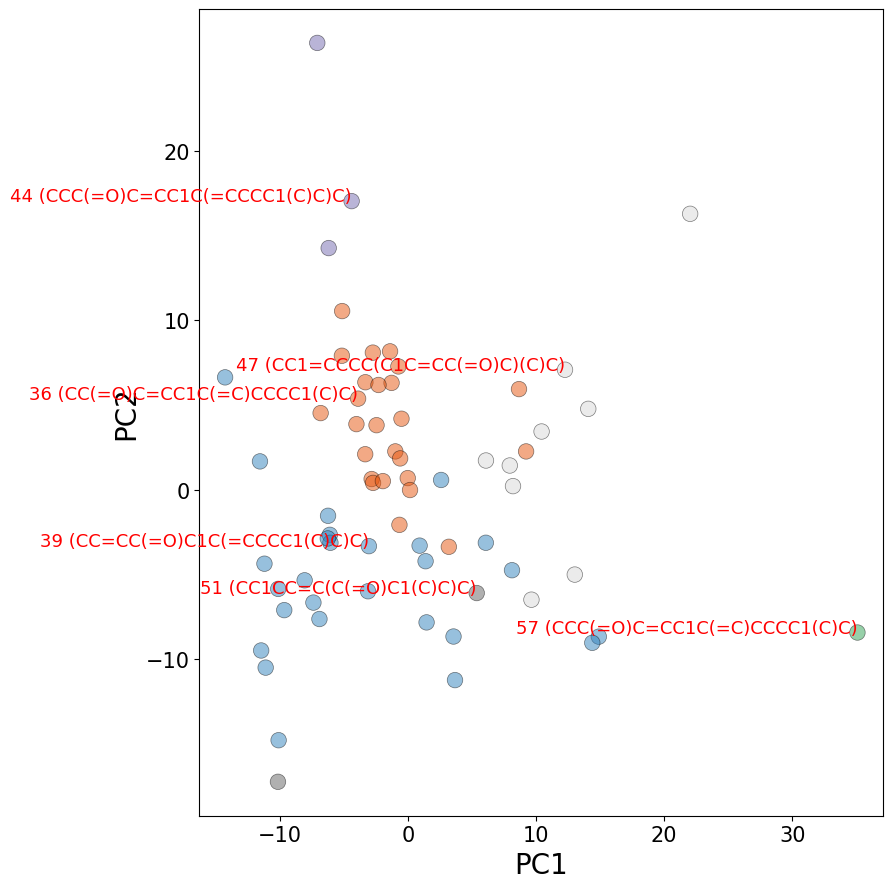

In [92]:
nclusters =  6    # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)
dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)
clusters = {}
clusterdists = {}
clustermins = []
clusterorders_dict = {}
clusterorders = np.zeros(X_kmeans.shape[0])
for x in range(nclusters):
    clusters[x] = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x] = [dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x] = [y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    for i in clusters[x]:
        clusterorders[i] = clusterorders_dict[x].index(i)+1
f_ind_1 = 0
f_ind_2 = 1
x_min, x_max = X_kmeans[:, f_ind_1].min() - 2, X_kmeans[:, f_ind_1].max() + 2
y_min, y_max = X_kmeans[:, f_ind_2].min() - 2, X_kmeans[:, f_ind_2].max() + 2
plt.figure(figsize=(9,9))
extent = [x_min,x_max,y_min,y_max]
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel(r"PC1",fontsize=20)
plt.ylabel(r"PC2",fontsize=20)
plt.locator_params(axis='y', nbins=8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
mapping = kmeans.labels_
cMap = "tab20c"
plt.scatter(X_kmeans[:,f_ind_1], X_kmeans[:,f_ind_2],c=mapping,cmap=cMap,alpha=.5,marker=".",s=500,edgecolor="black",linewidth=0.5)
main_row_id = list(enumerate(X_main_ids))
clusters_with_ids = {}
for i in range(0,len(clusters)):
    emptylist = []
    for j in range(0,len(clusters[i])):
        emptylist.append(main_row_id[clusters[i][j]][1])
    clusters_with_ids[i] = emptylist
    
# plot centroid labels with SMILES
for i in range(nclusters):
    for j in range(len(clusters_with_ids[i])):
        if clusters[i][j] in clustermins:
            smiles = smiles_list[clusters_with_ids[i][j]]  # get the SMILES string for this ID
            plt.text(X_use[clusters[i][j],f_ind_1], X_use[clusters[i][j],f_ind_2],
                     f"{clusters_with_ids[i][j]} ({smiles})", color="red", fontsize=13, ha="right")
    
### plot ligand ids    
#for i in range(0,nclusters):
#   for j in range(0,len(clusters_with_ids[i])):
#      plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="blue",fontsize=12,ha="left")

# plot centroid labels
#for i in range(0,nclusters):
#    for j in range(0,len(clusters_with_ids[i])):
#        if clusters[i][j] in clustermins:
#           plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="red",fontsize=13,ha="right")
    
plt.tight_layout()
#plt.savefig("mordred_pca_plot.png",dpi=300)
plt.show()     


## Optimum No. of Clusters based on BIC, AIC, and Silhouette Score

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nclusters = 6  # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca

kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)

dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)

clusters = {}
clusterdists = {}
clustermins=[]
clusterorders_dict={}
clusterorders=np.zeros(X_kmeans.shape[0])

for x in range(nclusters):
    clusters[x] =[i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x]=[dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x]=[y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    
for i in clusters:
     print("Cluster", i+1, ":", len(clusters[i]), "data points")

# Calculate BIC and AIC scores
from sklearn.cluster import KMeans

# ...

bic_scores=[]
aic_scores=[]

for k_value in range(2, nclusters + 1):
    kmeans_k = KMeans(n_clusters=k_value, random_state=42)
    kmeans_k.fit(X_kmeans)

    # BIC calculation
    bic_score = (-2 * kmeans_k.score(X_kmeans) + np.log(len(X_kmeans)) * k_value * np.log(len(X_kmeans)))

    # AIC calculation
    aic_score = (-2 * kmeans_k.score(X_kmeans) + 2 * len(kmeans_k.cluster_centers_) * X_kmeans.shape[1])

    bic_scores.append(bic_score)
    aic_scores.append(aic_score)

best_k_bic=np.argmin(bic_scores)+2 
best_k_aik =np.argmin(aic_scores)+2 

print("Best number of clusters based on BIC:", best_k_bic)
print("Best number of clusters based on AIC:", best_k_aik)

# Calculate Silhouette Score

labels=kmeans.labels_
silhouette_avg=silhouette_score(X_use, labels)
print("Silhouette Score for", nclusters, "clusters:", silhouette_avg)



Cluster 1 : 27 data points
Cluster 2 : 25 data points
Cluster 3 : 1 data points
Cluster 4 : 3 data points
Cluster 5 : 2 data points
Cluster 6 : 9 data points
Best number of clusters based on BIC: 6
Best number of clusters based on AIC: 6
Silhouette Score for 6 clusters: 0.14381869339087786


#### silhouette score is the lowest for k=6 clusters, while BIC and AIC score = k for K clusters, implying that increasing the number of clusters is not making a difference. Therefore, we compare the silhouette score.

# printing structures closest to the centroids


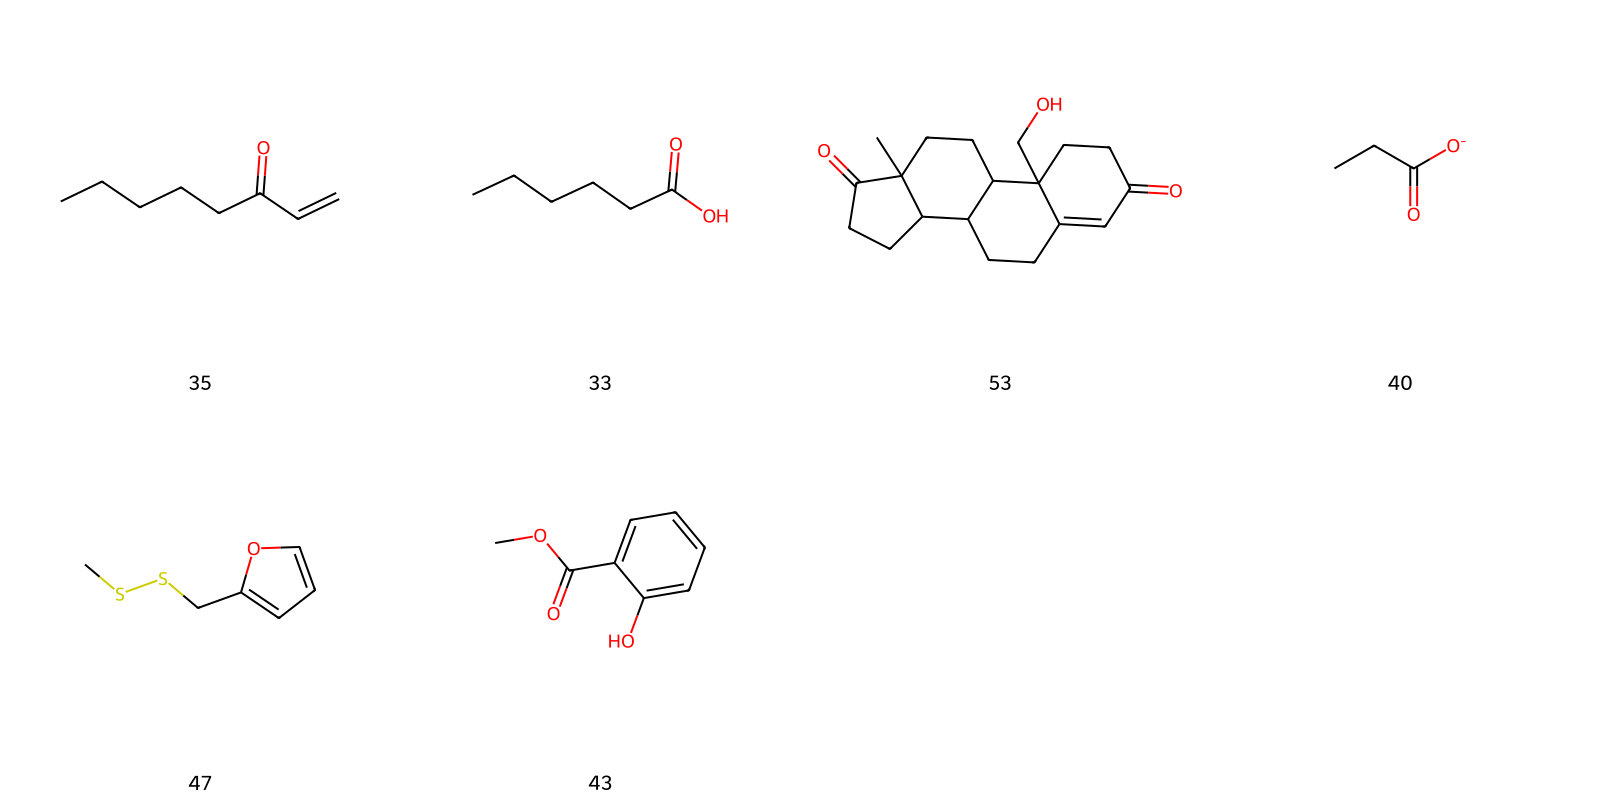

In [75]:
smiles = list(mols['SMILES'])

closest_to_centroids = []
for i in clustermins:
    closest_to_centroids.append(smiles[i])

count=0
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    count+=1
    subms.append(x)
clustermins_str = [str(i) for i in clustermins]
my_labels = clustermins_str  
molsPerRow = 4
subImgSize= (400,400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1]) # setting up the image
img.drawOptions().legendFontSize=20
img.DrawMolecules(subms[:],legends=my_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('centroids.png','wb+') as wfp:      # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())           # saving in the image
Image.open('centroids.png')                   # opening it in the notebook

In [76]:
smiles = list(mols['SMILES'])

centroid_smiles = []
for i, centroid_index in enumerate(clustermins):
    centroid_smiles.append(smiles[centroid_index])
    print(f"Cluster {i+1} centroid SMILES: {smiles[centroid_index]}")


Cluster 1 centroid SMILES: CCCCCC(=O)C=C
Cluster 2 centroid SMILES: CCCCCC(=O)O
Cluster 3 centroid SMILES: CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO
Cluster 4 centroid SMILES: CCC(=O)[O-]
Cluster 5 centroid SMILES: CSSCC1=CC=CO1
Cluster 6 centroid SMILES: COC(=O)C1=CC=CC=C1O


In [83]:
import pubchempy as pcp


def find_similar_molecules(smiles, similarity=90, max_results=10):
    results = pcp.get_compounds(smiles, 'smiles', listkey_count=max_results, listkey_sim=similarity)
    similar_molecules = []
    for result in results:
        similar_molecules.append(result.canonical_smiles)
    return similar_molecules

centroid_smiles = ['CCCCCOC(=O)CC', 'CC1=CCCC(C1/C=C/C(=O)C)(C)C', 'CCCCCC=O', 'CC(=O)OCC1=CC=CC=C1', 'CSSC', 'CCC(C)C(=O)O']

for smiles in centroid_smiles:
    similar_molecules = find_similar_molecules(smiles, similarity=90, max_results=10)
    print(f"Similar molecules for {smiles}:")
    for molecule in similar_molecules:
        print(molecule)
    print()


Similar molecules for CCCCCOC(=O)CC:
CCCCCOC(=O)CC

Similar molecules for CC1=CCCC(C1/C=C/C(=O)C)(C)C:
CC1=CCCC(C1C=CC(=O)C)(C)C

Similar molecules for CCCCCC=O:
CCCCCC=O

Similar molecules for CC(=O)OCC1=CC=CC=C1:
CC(=O)OCC1=CC=CC=C1

Similar molecules for CSSC:
CSSC

Similar molecules for CCC(C)C(=O)O:
CCC(C)C(=O)O



In [78]:
import pubchempy as pcp

def find_similar_molecules(smiles, similarity=90, max_results=10):
    results = pcp.get_compounds(smiles, 'SMILES', searchtype='similarity', listkey_count=max_results)
    similar_molecules = []
    for result in results:
        similar_molecules.append(result.canonical_smiles)
    return similar_molecules

centroid_smiles = ['CCCCCOC(=O)CC', 'CC1=CCCC(C1/C=C/C(=O)C)(C)C', 'CCCCCC=O', 'CC(=O)OCC1=CC=CC=C1', 'CSSC', 'CCC(C)C(=O)O']

for smiles in centroid_smiles:
    similar_molecules = find_similar_molecules(smiles, similarity=90, max_results=20)
    print(f"Similar molecules for {smiles}:")
    for molecule in similar_molecules:
        print(molecule)
    print()

Similar molecules for CCCCCOC(=O)CC:
CCCCCCOC(=O)CC
CCCCCCOC(=O)CCC
CCCCCCOC(=O)C
CCCCCOC(=O)CCC
CCCCC(=O)OCCC
CCCCC(=O)OCCCC
CCCCCOC(=O)CC
CCCCCOC(=O)CCCC
CCCCCOC(=O)C(C)C
CCCCCOCCOC(=O)C
CCCC(C)OC(=O)CC
CCC(=O)OCCCCCOC(=O)CC
CCCCCOC(=O)C(C)(C)C
CCCCCOC(=O)CCOC
CCCCCOC(=O)CCOCC
CCCCCOCCC(=O)OCCCCC
CCCCCOCCC(=O)OCC
CCCCCOCCC(=O)OC
CCC(=O)OCCCCCCOC(=O)CC
CCCCCOC(=O)CCOCCC

Similar molecules for CC1=CCCC(C1/C=C/C(=O)C)(C)C:
CC1=CCCC(C1C=C(C)C(=O)C)(C)C
CC1=CCCC(C1C=CC(=O)C)(C)C
CCC(=O)C=CC1C(=CCCC1(C)C)C
CC1CC=C(C(C1(C)C)C=CC(=O)C)C
CC1=CCCC(C1C=CC(=O)CCC=C)(C)C
CC=CC(=O)C1C(=CCCC1(C)C)C
CC(=O)C=CC1C(=C)CCCC1(C)C
CCC(=O)C=CC1C(=CCCC1(C)C)C
CCC(=O)C=CC1C(=CCCC1(C)C)C
CC=CC(=O)C1C(=CCCC1(C)C)C
CCC(=O)C=CC1C(C=CCC1(C)C)C
CC1CCC(=C(C1(C)C)C=CC(=O)C)C
CC1CC=C(C(C1(C)C)C=CC(=O)C)C
CC=CC(=O)C1C(=CCCC1(C)C)C
CCC(=O)C=CC1C(=CCCC1(C)C)C
CC1CCC(=C)C(C1(C)C)C=CC(=O)C
CC1CC(=CC(C1C=CC(=O)C)C)C
CC1=CCCC(C1C=CC(=O)C)(C)C
CC1=CC(=O)CC(C1C=CC(=O)C)(C)C
CC1=CCCC(C1C=C(C)C(=O)C)(C)C

Similar molecules for 

In [84]:
import csv
import pubchempy as pcp

def find_similar_molecules(smiles, similarity=90, max_results=30):
    results = pcp.get_compounds(smiles, 'smiles', searchtype='similarity', listkey_count=max_results)
    similar_molecules = []
    for result in results:
        similar_molecules.append(result.canonical_smiles)
    return similar_molecules

centroid_smiles = ['CCCCCOC(=O)CC', 'CC1=CCCC(C1/C=C/C(=O)C)(C)C', 'CCCCCC=O', 'CC(=O)OCC1=CC=CC=C1', 'CSSC', 'CCC(C)C(=O)O']

with open('pubchemsimilarcentroid_agonist.csv', mode='w') as file:
    writer = csv.writer(file)

    smiles_list = []

    for smiles in centroid_smiles:
        similar_molecules = find_similar_molecules(smiles, similarity=90, max_results=30)
        
        smiles_list.extend(similar_molecules)

    writer.writerow(["SMILES"])
    
    # Write each smile on a new row
    for smile in smiles_list:
        writer.writerow([smile])

print("Similar molecules saved to CSV file.")

Similar molecules saved to CSV file.


In [85]:
import csv
file1 = "/home/ritesh/Desktop/MOLECULES/morgan/pubchemsimilarcentroid_agonist.csv.csv"
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"


In [87]:
import pandas as pd

def merge_csv_files(file1, file2, output_file):
    # Load CSV files into pandas DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Concatenate the DataFrames
    merged_df = pd.concat([df1, df2], ignore_index=True)

    # Drop duplicates based on the "SMILES" column
    merged_df.drop_duplicates(subset="SMILES", inplace=True)
    
    # Save merged DataFrame to a new CSV file
    merged_df.to_csv(output_file, index=False)

    print("CSV files merged successfully!")

# Usage example
file1 = "/home/ritesh/Desktop/MOLECULES/morgan/pubchemsimilarcentroid_agonist.csv"
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
output_file = 'final_descriptor_smiles_agonist.csv'

merge_csv_files(file1, file2, output_file)


CSV files merged successfully!


In [99]:
file5 = "/home/ritesh/Desktop/MOLECULES/morgan/final_descriptor_smiles_agonist.csv"

## spider plot to visualize the descriptors and smiles

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D

[16:17:49] UFFTYPER: Unrecognized charge state for atom: 0
[16:17:49] UFFTYPER: Unrecognized atom type: Zn+2 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:49] UFFTYPER: Unrecognized atom type: Y_1 (0)
[16:17:50] WARNING: not removing hydrogen atom without neighbors
[16:17:50] WARNING: not removing hydrogen atom without neighbors
[16:17:50] UFFTYPER: Unrecognized atom type: Ag5+1 (0)
[16:17:50] WARNING: not removing hydrogen atom without neighbors


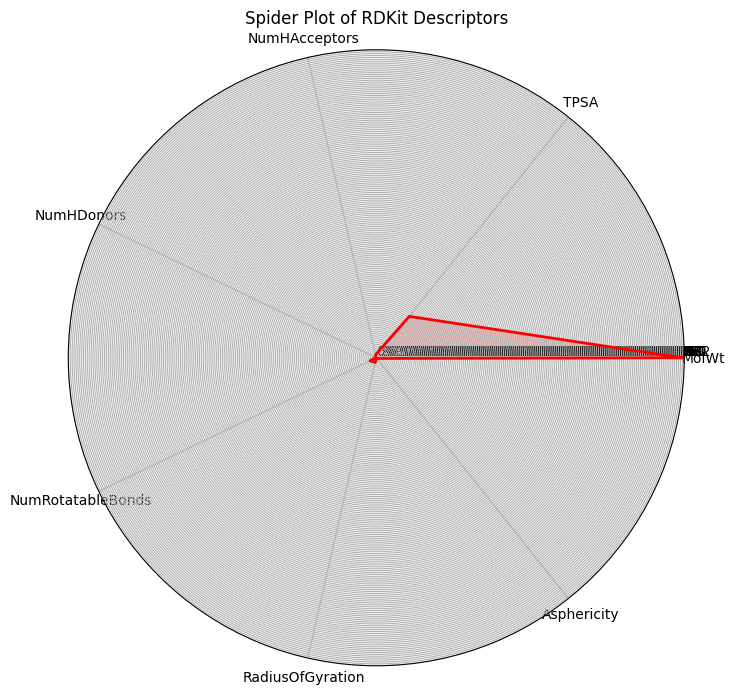

In [107]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
import matplotlib.pyplot as plt

# Step 1: Read the data from the CSV file
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/final_descriptor_smiles_agonist.csv"
data = pd.read_csv(file2)

# Extract SMILES from the data
smiles = data['SMILES']

radius_of_gyration = []
asphericity = []

# Calculate 3D descriptors for each molecule in DataFrame using RDKit functions.
for smiles_str in smiles:
    mol = Chem.MolFromSmiles(smiles_str)
    if mol is not None:
        mol_with_hydrogens = Chem.AddHs(mol)  # Add hydrogens to the molecule
        AllChem.EmbedMolecule(mol_with_hydrogens, AllChem.ETKDG())  # Generate a 3D conformation
        
        radius_of_gyration.append(Descriptors3D.RadiusOfGyration(mol_with_hydrogens))
        asphericity.append(Descriptors3D.Asphericity(mol_with_hydrogens))
    else:
        radius_of_gyration.append(np.nan)
        asphericity.append(np.nan)

# Step 2: Calculate additional RDKit descriptors for each molecule in `smiles`
descriptors_values_list = []
for smiles_str in smiles:
    mol = Chem.MolFromSmiles(smiles_str)
    if mol is not None:
        descriptor_values = [
            Descriptors.MolWt(mol),
            Descriptors.TPSA(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumRotatableBonds(mol)
        ]
        descriptors_values_list.append(descriptor_values)
    else:
        descriptors_values_list.append([np.nan] * 5)  # Placeholder for invalid SMILES

# Convert the descriptor values to a DataFrame
descriptors_df = pd.DataFrame(descriptors_values_list, columns=['MolWt', 'TPSA', 'NumHAcceptors', 'NumHDonors',
                                                               'NumRotatableBonds'])

# Add previously computed descriptors to the DataFrame
descriptors_df['RadiusOfGyration'] = radius_of_gyration
descriptors_df['Asphericity'] = asphericity

# Step 3: Plot the spider plot
categories = ['MolWt', 'TPSA', 'NumHAcceptors', 'NumHDonors','NumRotatableBonds',
              'RadiusOfGyration', 'Asphericity']
values = descriptors_df[categories].mean().values.tolist()

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the plot

# Plot the spider plot
plt.figure(figsize=(8, 8))  # Optional: adjust the figure size
ax = plt.subplot(111, polar=True)  # Create a polar axis

# Plot the values as a line plot and fill enclosed area with color.
plt.plot(angles, values + [values[0]], color='red', linewidth=2)
plt.fill(angles, values + [values[0]], alpha=0.25, color='red')

# Set labels for each category on x-axis.
plt.xticks(angles[:-1], categories)

# Set axis limits and labels.
plt.ylim(0, max(values) + 1)
plt.yticks(np.arange(0, max(values) + 2))
ax.set_rlabel_position(0)

# Add title to the plot.
plt.title('Spider Plot of RDKit Descriptors')

# Display the plot
plt.show()

In [ ]:
from rdkit.Chem import Descriptors

# Step 1: Read the data from the CSV file
data = pd.read_csv(file5)

# Extract SMILES from the data
smiles = data['SMILES']
radius_of_gyration = []
asphericity = []
# For each molecule in the DataFrame
for index, row in df.iterrows():
    smiles = row['SMILES']  # Getting the SMILES string from the "SMILES" column for the current row


    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))
    asphericity.append(Descriptors3D.Asphericity(molecule))
# Step 2: Calculate the RDKit descriptors
descriptors = []
for sm in smiles:
    mol = Chem.MolFromSmiles(sm)
    if mol is not None:
        descriptor_values = [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.NumRotatableBonds(mol),
            Descriptors.TPSA(mol),
        ]
        descriptors.append(descriptor_values)
    else:
        descriptors.append([np.nan] * 5)  # Placeholder for invalid SMILES

# Convert the descriptors to a DataFrame
descriptors_df = pd.DataFrame(descriptors, columns=['MolWt', 'TPSA', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
descriptors_df['RadiusOfGyration'] = radius_of_gyration
descriptors_df['Asphericity'] = asphericity
# Step 3: Plot the spider plot
categories = descriptors_df.columns.tolist()
values = descriptors_df.mean().values.tolist()

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the plot

# Plot the spider plot
plt.figure(figsize=(8, 8))  # Optional: adjust the figure size
ax = plt.subplot(111, polar=True)  # Create a polar axis

# Plot the values as a line plot
plt.plot(angles, values + [values[0]], color='red', linewidth=2)  # Add the first value at the end to close the plot

# Fill the area enclosed by the line plot
plt.fill(angles, values + [values[0]], alpha=0.25, color='red')  # Add the first value at the end to close the plot

# Set the labels for each category
plt.xticks(angles[:-1], categories)

# Set the axis limits and labels
plt.ylim(0, max(values) + 1)  # Optional: adjust the y-axis limits
plt.yticks(np.arange(0, max(values) + 2))  # Optional: customize the y-axis tick values
ax.set_rlabel_position(0)  # Set the position of the radial labels

# Add a title to the plot
plt.title('Spider Plot of RDKit Descriptors')

# Display the plot
plt.show()
